In [1]:
import os, sys
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks')
nb_path = '/content/notebooks'
os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/drive


In [2]:
os.listdir() #確認目錄內容

['pong.csv',
 '「04-pytorch-mnist.ipynb」的副本',
 'keras model',
 'driver_tf.ipynb',
 'driver_pt.ipynb']

In [ ]:
!pip install --target=$nb_path torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1MB 1.3MB/s eta 0:04:04tcmalloc: large alloc 1147494400 bytes == 0x5559df116000 @  0x7fa8e3d76615 0x5559a5379cdc 0x5559a545952a 0x5559a537cafd 0x5559a546dfed 0x5559a53f0988 0x5559a53eb4ae 0x5559a537e3ea 0x5559a53f07f0 0x5559a53eb4ae 0x5559a537e3ea 0x5559a53ed32a 0x5559a546ee36 0x5559a53ec853 0x5559a546ee36 0x5559a53ec853 0x5559a546ee36 0x5559a53ec853 0x5559a546ee36 0x5559a54f13e1 0x5559a54516a9 0x5559a53bccc4 0x5559a537d559 0x5559a53f14f8 0x5559a537e30a 0x5559a53ec3b5 0x5559a53eb7ad 0x5559a537e3ea 0x5559a53ec3b5 0x5559a537e30a 0x5559a53ec3b5
     |█████████████████████████████▏  | 1055.7MB 1.2MB/s eta 0:01:25tcmalloc: large alloc 1434370048 bytes == 0x555a2376c000 @  0x7fa8e3d76615 0x5559a5379cdc 0x5559a545952a 0x5559a537cafd 0x5559a546dfed 0x5559a53f0988 0x5559a53eb4ae 0x5559a537e3ea 0x5559a53f07f0 0x5559a53eb4ae 0x5559a537e3ea 0x5559a53ed32a 0x5559a546ee36 0x5559a53ec853 0

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from torch.autograd import Variable
from torchvision import transforms as tfs
from numpy import array
from numpy import hstack

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

1.8.1+cu101
0.9.1+cu101


In [ ]:
read_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pong.csv')

In [ ]:
ax = read_data['ax'].to_numpy()
ay = read_data['ay'].to_numpy()
az = read_data['az'].to_numpy()

In [ ]:
print('ax:',ax)
print('ay:',ay)
print('az:',az)
print(hstack((ax,ay)))

ax: [9 8 7 6 5 4 3 2 1 9 8 7 6 5 4 3 2 1 9 8 7 6 5 4 3 2 1 9 8 7 6 5 4 3 2 1 9
 8 7 6 5 4 3 2 1]
ay: [10 11 12 13 14 15 16 17 18 10 11 12 13 14 15 16 17 18 10 11 12 13 14 15
 16 17 18 10 11 12 13 14 15 16 17 18 10 11 12 13 14 15 16 17 18]
az: [27 26 25 24 23 22 21 20 19 27 26 25 24 23 22 21 20 19 27 26 25 24 23 22
 21 20 19 27 26 25 24 23 22 21 20 19 27 26 25 24 23 22 21 20 19]
[ 9  8  7  6  5  4  3  2  1  9  8  7  6  5  4  3  2  1  9  8  7  6  5  4
  3  2  1  9  8  7  6  5  4  3  2  1  9  8  7  6  5  4  3  2  1 10 11 12
 13 14 15 16 17 18 10 11 12 13 14 15 16 17 18 10 11 12 13 14 15 16 17 18
 10 11 12 13 14 15 16 17 18 10 11 12 13 14 15 16 17 18]


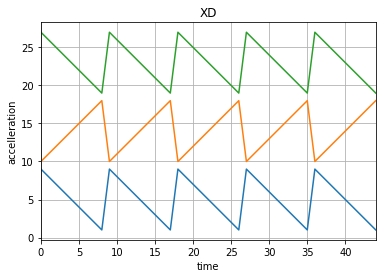

In [ ]:
plt.title('XD')
plt.ylabel('accelleration')
plt.xlabel('time')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(ax)
plt.plot(ay)
plt.plot(az)

In [ ]:
m = pd.get_dummies(read_data.motion,prefix='motion')
m_ = m.to_numpy()
motion = torch.tensor(m_)
print(motion[0:4,1])
print(motion[0:4])

tensor([0, 1, 0, 0], dtype=torch.uint8)
tensor([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0]], dtype=torch.uint8)


Normalizing the input data

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
ax_nor = scaler.fit_transform(ax.reshape(-1, 1))
ay_nor = scaler.fit_transform(ay.reshape(-1, 1))
az_nor = scaler.fit_transform(az.reshape(-1, 1))

In [ ]:
ax_nor = torch.FloatTensor(ax_nor).view(-1)
ay_nor = torch.FloatTensor(ay_nor).view(-1)
az_nor = torch.FloatTensor(az_nor).view(-1)

In [ ]:
print('ax_nor:',ax_nor[0:9])

ax_nor: tensor([ 1.0000,  0.7500,  0.5000,  0.2500,  0.0000, -0.2500, -0.5000, -0.7500,
        -1.0000])


Transform the input data to train sequences

In [ ]:
#Multiple Parallel Series
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :3], sequences[end_ix, 3:]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# horizontally stack columns
dataset = hstack((ax_nor, ay_nor, az_nor, motion))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

IndexError: ignored

In [ ]:
print(type (train_seq))
print(train_seq)

<class 'list'>
[(tensor([1.0000, 0.7500, 0.5000, 0.2500, 0.0000]), tensor([-1.0000, -0.7500, -0.5000, -0.2500,  0.0000]), tensor([1.0000, 0.7500, 0.5000, 0.2500, 0.0000]), tensor([1, 0, 0, 0, 0], dtype=torch.uint8)), (tensor([ 0.7500,  0.5000,  0.2500,  0.0000, -0.2500]), tensor([-0.7500, -0.5000, -0.2500,  0.0000,  0.2500]), tensor([ 0.7500,  0.5000,  0.2500,  0.0000, -0.2500]), tensor([0, 1, 0, 0, 0], dtype=torch.uint8)), (tensor([ 0.5000,  0.2500,  0.0000, -0.2500, -0.5000]), tensor([-0.5000, -0.2500,  0.0000,  0.2500,  0.5000]), tensor([ 0.5000,  0.2500,  0.0000, -0.2500, -0.5000]), tensor([0, 0, 1, 0, 0], dtype=torch.uint8)), (tensor([ 0.2500,  0.0000, -0.2500, -0.5000, -0.7500]), tensor([-0.2500,  0.0000,  0.2500,  0.5000,  0.7500]), tensor([ 0.2500,  0.0000, -0.2500, -0.5000, -0.7500]), tensor([0, 0, 0, 1, 0], dtype=torch.uint8)), (tensor([ 0.0000, -0.2500, -0.5000, -0.7500, -1.0000]), tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000]), tensor([ 0.0000, -0.2500, -0.5000, -0.7500, 

Creating LSTM model

In [ ]:
class LSTM_classifier(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1, num_class=5):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))
        
        self.classifier = nn.Linear(hidden_layer_size, num_class)

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.classifier(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [ ]:
model = LSTM_classifier() # copy from mnist example
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adadelta(model.parameters(), 1e-1)

In [ ]:
def get_acc(output, label):
    total = output.shape[0]
    _, pred_label = output.max(1)
    num_correct = (pred_label == label).sum().item()
    return num_correct / total

In [ ]:
def train(model, train_data, valid_data, num_epochs, optimizer, loss_function):
    if torch.cuda.is_available():
        model = model.cuda()
    prev_time = datetime.datetime.now()
    for epoch in range(num_epochs):
        train_loss = 0
        train_acc = 0
        model = model.train()
        for im, label in train_data:
            if torch.cuda.is_available():
                im = Variable(im.cuda())  # (bs, 3, h, w)
                label = Variable(label.cuda())  # (bs, h, w)
            else:
                im = Variable(im)
                label = Variable(label)
            # forward
            output = model(im)
            loss = loss_function(output, label)
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_acc += get_acc(output, label)

        cur_time = datetime.datetime.now()
        h, remainder = divmod((cur_time - prev_time).seconds, 3600)
        m, s = divmod(remainder, 60)
        time_str = "Time %02d:%02d:%02d" % (h, m, s)
        if valid_data is not None:
            valid_loss = 0
            valid_acc = 0
            model = model.eval()
            for im, label in valid_data:
                if torch.cuda.is_available():
                    im = Variable(im.cuda())
                    label = Variable(label.cuda())
                else:
                    im = Variable(im)
                    label = Variable(label)
                output = model(im)
                loss = criterion(output, label)
                valid_loss += loss.item()
                valid_acc += get_acc(output, label)
            epoch_str = (
                "Epoch %d. Train Loss: %f, Train Acc: %f, Valid Loss: %f, Valid Acc: %f, "
                % (epoch, train_loss / len(train_data),
                   train_acc / len(train_data), valid_loss / len(valid_data),
                   valid_acc / len(valid_data)))
        else:
            epoch_str = ("Epoch %d. Train Loss: %f, Train Acc: %f, " %
                         (epoch, train_loss / len(train_data),
                          train_acc / len(train_data)))
        prev_time = cur_time
        print(epoch_str + time_str)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
train(model, train_seq, train_seq, 10, optimizer, criterion) 

In [ ]:
epochs = 100

for i in range(epochs):
    for seq, labels in train_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

IndexError: ignored